<a href="https://colab.research.google.com/github/taliyameyswara/garbage-bag-classification/blob/main/bagClasses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Klasifikasi Kucing 🐱 dan Anjing 🐶 dengan CNN**
Proyek Akhir Dicoding Klasifikasi Gambar - Belajar Machine Learning untuk Pemula <br>
> 🧏‍♂️ Taliya Meyswara - taliyameyswara@gmail.com

In [1]:
import tensorflow as tf
print(tf.__version__)

2.15.0


# **Mempersiapkan Dataset 🔋**
Menggunakan [Dataset Plastic - Paper - Garbage Bag Synthetic Images](https://www.kaggle.com/datasets/vencerlanz09/plastic-paper-garbage-bag-synthetic-images/code) dari kaggle.

In [2]:
!pip install kaggle

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"taliyameyswara","key":"f1f7923ce6f64df970c7fec88b14b142"}'}

In [4]:
# Membuat directory bernama kaggle dan copy file kaggle.json disana
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
# Mengubah permission file
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
# Mengunduh Dataset
dataset_name = 'vencerlanz09/plastic-paper-garbage-bag-synthetic-images'
!kaggle datasets download -d {dataset_name}

 98% 444M/451M [00:04<00:00, 127MB/s]
100% 451M/451M [00:04<00:00, 96.3MB/s]


# **Ekstrasi Data 💥**

In [6]:
# Melakukan ekstraksi pada file zip
import zipfile,os

# Lokasi file zip yang telah diunduh
local_zip = 'plastic-paper-garbage-bag-synthetic-images.zip'

if not os.path.exists('dataset'):
    # Jika belum ada, maka buat direktori baru
    os.mkdir('dataset')

zip_ref = zipfile.ZipFile(local_zip, 'r') # membuka file zip
zip_ref.extractall('/dataset') # mengekstrak semua isi file zip ke direktori dataset
zip_ref.close() # menutup file zip yang telah di ekstrak


dataset = os.path.join('/dataset')
print(os.listdir(dataset))

['ImageClassesCombinedWithCOCOAnnotations', 'Bag Classes']


In [7]:
base_dir = '/dataset/Bag Classes/Bag Classes' # direktori utama tempat data akan disimpan
print(os.listdir(base_dir))

['Garbage Bag Images', 'Paper Bag Images', 'Plastic Bag Images']


# **Augmentasi Data 🧩**
Augmentasi gambar merupakan sebuah teknik yang dapat digunakan untuk memperbanyak data latih dengan cara menduplikasi gambar yang telah ada dengan menambahkan variasi tertentu.

Menerapkan ImageDataGenerator untuk data latih dan data validasi (preprocessing data, pelabelan sampel otomatis, dan augmentasi gambar.)

In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
batch_size = 32
img_size = 224

datagen = ImageDataGenerator(rescale=1/255.,
                             rotation_range=20,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest',
                             validation_split=0.15)

menyiapkan data training dan validasi dari kumpulan data melalui fungsi flow()

In [9]:
train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    shuffle=True,
    class_mode='categorical',
    subset='training')

Found 12750 images belonging to 3 classes.


In [10]:
validation_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    shuffle=False,
    class_mode='categorical',
    subset='validation')

Found 2250 images belonging to 3 classes.


# **Membuat Model CNN🕺**

In [23]:
model = tf.keras.models.Sequential([
    # Conv layer 1
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (img_size,img_size,3)),
    tf.keras.layers.MaxPooling2D(2,2),

    # Conv layer 2
    tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # Conv layer 3
    tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # Conv layer 4
    tf.keras.layers.Conv2D(256,(3,3), activation= 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # Flatten layer
    tf.keras.layers.Flatten(),

    # Dense layer
    tf.keras.layers.Dense(512, activation= 'relu'),

    # Output layer
    tf.keras.layers.Dropout(0.1), # menambahkan dropout
    tf.keras.layers.Dense(3, activation= 'softmax')
])

# Compile Model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 26, 26, 128)      

# **Melatih Model (Model Fitting)👩‍🏫**

In [14]:
history = model.fit(
    train_generator,
    steps_per_epoch = 4,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 5,
    verbose =2
)

Epoch 1/20
4/4 - 29s - loss: 0.4026 - accuracy: 0.8672 - val_loss: 0.5044 - val_accuracy: 0.8313 - 29s/epoch - 7s/step
Epoch 2/20
4/4 - 30s - loss: 0.4179 - accuracy: 0.8438 - val_loss: 0.2404 - val_accuracy: 0.9375 - 30s/epoch - 7s/step
Epoch 3/20
4/4 - 27s - loss: 0.7074 - accuracy: 0.7500 - val_loss: 0.4317 - val_accuracy: 0.8750 - 27s/epoch - 7s/step
Epoch 4/20
4/4 - 28s - loss: 0.5021 - accuracy: 0.7656 - val_loss: 0.3323 - val_accuracy: 0.9000 - 28s/epoch - 7s/step
Epoch 5/20
4/4 - 29s - loss: 0.5960 - accuracy: 0.7422 - val_loss: 0.1135 - val_accuracy: 0.9688 - 29s/epoch - 7s/step
Epoch 6/20
4/4 - 29s - loss: 0.5380 - accuracy: 0.8281 - val_loss: 0.4448 - val_accuracy: 0.8562 - 29s/epoch - 7s/step
Epoch 7/20
4/4 - 29s - loss: 0.4736 - accuracy: 0.7969 - val_loss: 0.3299 - val_accuracy: 0.9062 - 29s/epoch - 7s/step
Epoch 8/20
4/4 - 27s - loss: 0.3898 - accuracy: 0.8455 - val_loss: 0.5784 - val_accuracy: 0.8313 - 27s/epoch - 7s/step
Epoch 9/20
4/4 - 30s - loss: 0.4064 - accuracy: 

# **Evaluasi Model ✅**

In [19]:
# Evaluasi model
evaluation_results = model.evaluate(validation_generator)

# Menyimpan nilai loss dan akurasi ke dalam variabel
loss = evaluation_results[0]
accuracy = evaluation_results[1]

# Menampilkan loss dan akurasi
print("Loss:", loss)
print("Accuracy:", accuracy)

71/71 [==============================] - 110s 2s/step - loss: 0.3701 - accuracy: 0.8662
Loss: 0.37012413144111633
Accuracy: 0.8662222027778625


# **Memprediksi Gambar 🖼️**

Saving sbucks.jpeg to sbucks.jpeg
1/1 [==============================] - 0s 57ms/step
sbucks.jpeg
Paper Bag


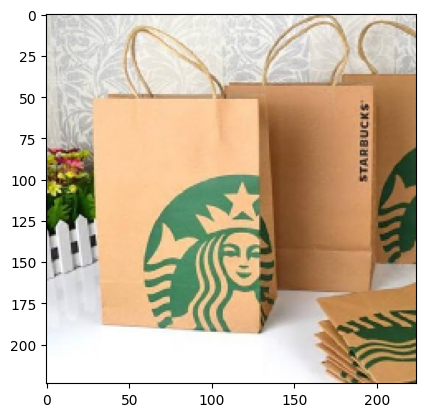

In [22]:
import numpy as np
# from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn
  img = image.load_img(path, target_size =(img_size,img_size))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=batch_size)

  print(fn)
  if classes[0,0]!=0:
    print('Garbage Bag')
  elif classes[0,1]!=0:
    print('Paper Bag')
  else:
    print('Plastic Bag')